## IMPORTS

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## GET THE DATA

In [28]:
column_names=['user_id', 'item_id', 'rating', 'timestamp']
df=pd.read_csv('u.data',sep='\t',names=column_names)


In [29]:
df.head()

user_id  item_id  rating  timestamp
0        0       50       5  881250949
1        0      172       5  881250949
2        0      133       1  881250949
3      196      242       3  881250949
4      186      302       3  891717742

In [30]:
mov_titles=pd.read_csv('Movie_Id_Titles')
mov_titles.head()

item_id              title
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)

In [31]:
df=pd.merge(df,mov_titles,on='item_id')
df.head()

user_id  item_id  rating  timestamp             title
0        0       50       5  881250949  Star Wars (1977)
1      290       50       5  880473582  Star Wars (1977)
2       79       50       4  891271545  Star Wars (1977)
3        2       50       5  888552084  Star Wars (1977)
4        8       50       5  879362124  Star Wars (1977)

## EXPLORATORY DATA ANALYSIS

In [32]:
sns.set_style('white')

Let's create a ratings dataframe with average rating and number of ratings:

In [33]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [34]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [35]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

rating
title                              
'Til There Was You (1997)  2.333333
1-900 (1994)               2.600000
101 Dalmatians (1996)      2.908257
12 Angry Men (1957)        4.344000
187 (1997)                 3.024390

In [36]:
ratings['num_of_ratings']=df.groupby('title')['rating'].count()

In [37]:
ratings.head()

rating  num_of_ratings
title                                              
'Til There Was You (1997)  2.333333               9
1-900 (1994)               2.600000               5
101 Dalmatians (1996)      2.908257             109
12 Angry Men (1957)        4.344000             125
187 (1997)                 3.024390              41

E:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


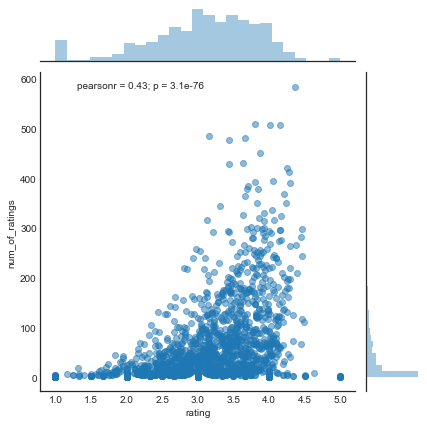

In [38]:
sns.jointplot(x='rating',y='num_of_ratings',data=ratings,alpha=0.5)

## RECOMMENDING SIMILAR MOVIES

A matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie.

In [39]:
moviemat=df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
0                              NaN           NaN                    NaN   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
0                        NaN         NaN                          NaN   
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   

title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
user_id                                                                      
0                                        NaN                           NaN   
1                                        3.0                           4.0   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   

title    3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
user_id                                                                      
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2                                                1.0                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   

title                   ...                  Yankee Zulu (1994)  \
user_id                 ...                                       
0                       ...                                 NaN   
1                       ...                                 NaN   
2                       ...                                 NaN   
3                       ...                                 NaN   
4                       ...                                 NaN   

title    Year of the Horse (1997)  You So Crazy (1994)  \
user_id                                                  
0                             NaN                  NaN   
1                             NaN                  NaN   
2                             NaN                  NaN   
3                             NaN                  NaN   
4                             NaN                  NaN   

title    Young Frankenstein (1974)  Young Guns (1988)  Young Guns II (1990)  \
user_id                                                                       
0                              NaN                NaN                   NaN   
1                              5.0                3.0                   NaN   
2                              NaN                NaN                   NaN   
3                              NaN                NaN                   NaN   
4                              NaN                NaN                   NaN   

title    Young Poisoner's Handbook, The (1995)  Zeus and Roxanne (1997)  \
user_id                                                                   
0                                          NaN                      NaN   
1                                          NaN                      NaN   
2                                          NaN                      NaN   
3                                          NaN                

Most rated movies

In [40]:
ratings.sort_values('num_of_ratings',ascending=False).head(10)

rating  num_of_ratings
title                                                  
Star Wars (1977)               4.359589             584
Contact (1997)                 3.803536             509
Fargo (1996)                   4.155512             508
Return of the Jedi (1983)      4.007890             507
Liar Liar (1997)               3.156701             485
English Patient, The (1996)    3.656965             481
Scream (1996)                  3.441423             478
Toy Story (1995)               3.878319             452
Air Force One (1997)           3.631090             431
Independence Day (ID4) (1996)  3.438228             429

In [41]:
ratings.head()

rating  num_of_ratings
title                                              
'Til There Was You (1997)  2.333333               9
1-900 (1994)               2.600000               5
101 Dalmatians (1996)      2.908257             109
12 Angry Men (1957)        4.344000             125
187 (1997)                 3.024390              41

Grabbing the user ratings for two movies: one sci-fi i.e. StarWars and another a comdey:Liar Liar

In [42]:
star_wars_ratings=moviemat['Star Wars (1977)']
liar_liar_ratings=moviemat['Liar Liar (1997)']
star_wars_ratings.head()


user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [43]:
similar_to_starwars=moviemat.corrwith(star_wars_ratings)
similar_to_liarliar=moviemat.corrwith(liar_liar_ratings)

E:\anaconda\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
E:\anaconda\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


### Movies similar to starwars

In [44]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

Correlation
title                                 
'Til There Was You (1997)     0.872872
1-900 (1994)                 -0.645497
101 Dalmatians (1996)         0.211132
12 Angry Men (1957)           0.184289
187 (1997)                    0.027398

In [45]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

Correlation
title                                                          
Commandments (1997)                                         1.0
Cosi (1996)                                                 1.0
No Escape (1994)                                            1.0
Stripes (1981)                                              1.0
Man of the Year (1995)                                      1.0
Hollow Reed (1996)                                          1.0
Beans of Egypt, Maine, The (1994)                           1.0
Good Man in Africa, A (1994)                                1.0
Old Lady Who Walked in the Sea, The (Vieille qu...          1.0
Outlaw, The (1943)                                          1.0

Movies with less than 100 reviews to filter out the recommendation that don't make sense

In [46]:
corr_starwars = corr_starwars.join(ratings['num_of_ratings'])
corr_starwars.head()

Correlation  num_of_ratings
title                                                 
'Til There Was You (1997)     0.872872               9
1-900 (1994)                 -0.645497               5
101 Dalmatians (1996)         0.211132             109
12 Angry Men (1957)           0.184289             125
187 (1997)                    0.027398              41

In [47]:
corr_starwars[corr_starwars['num_of_ratings']>100].sort_values('Correlation',ascending=False).head()

Correlation  \
title                                                             
Star Wars (1977)                                       1.000000   
Empire Strikes Back, The (1980)                        0.748353   
Return of the Jedi (1983)                              0.672556   
Raiders of the Lost Ark (1981)                         0.536117   
Austin Powers: International Man of Mystery (1997)     0.377433   

                                                    num_of_ratings  
title                                                               
Star Wars (1977)                                               584  
Empire Strikes Back, The (1980)                                368  
Return of the Jedi (1983)                                      507  
Raiders of the Lost Ark (1981)                                 420  
Austin Powers: International Man of Mystery (1997)             130

### Recommending movies similar to liar-liar

In [48]:
corr_liarliar=pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar.head()

Correlation
title                                   
'Til There Was You (1997)       0.118913
101 Dalmatians (1996)           0.469765
12 Angry Men (1957)             0.066272
187 (1997)                      0.175145
2 Days in the Valley (1996)     0.040739

Movies with less than 80 reviews to filter out the recommendation that don't make sense

In [49]:
corr_liarliar=corr_liarliar.join(ratings['num_of_ratings'])
corr_liarliar.head()

Correlation  num_of_ratings
title                                                   
'Til There Was You (1997)       0.118913               9
101 Dalmatians (1996)           0.469765             109
12 Angry Men (1957)             0.066272             125
187 (1997)                      0.175145              41
2 Days in the Valley (1996)     0.040739              93

In [56]:
corr_liarliar[corr_liarliar['num_of_ratings']>80].sort_values('Correlation',ascending=False).head()

Correlation  num_of_ratings
title                                             
Liar Liar (1997)          1.000000             485
Batman Forever (1995)     0.516968             114
Bean (1997)               0.504689              91
Mask, The (1994)          0.484650             129
Down Periscope (1996)     0.472681             101